In [2]:
import networkx as nx
nx.__version__

'1.11'

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

- pgmpy 호환을 위하여 1.11로 설치

In [4]:
mpl.__version__

'3.3.3'

- 그래프 그리려면, matplotlib 버전 2.2.3이어야함...
- 아니면 networkx를 높여야 하는데, 그럼 pgmpy랑 충돌함.
- 씨빨

# NetworkX 패키지

In [5]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

- Graph 클래스 : 비방향성
- DiGraph 클래스 : 방향성

In [6]:
import networkx as nx
g1 = nx.DiGraph()

- node 생성

In [7]:
g1.add_node('a')
g1.add_node(1)
g1.add_node(2)
g1.nodes()

['a', 1, 2]

- edge 생성

In [8]:
g1.add_edge(1, 'a')
g1.add_edge(1, 2)
g1.edges()

[(1, 'a'), (1, 2)]

- graphviz와 pydot으로 시각화
- 오류남... ㅠㅠ

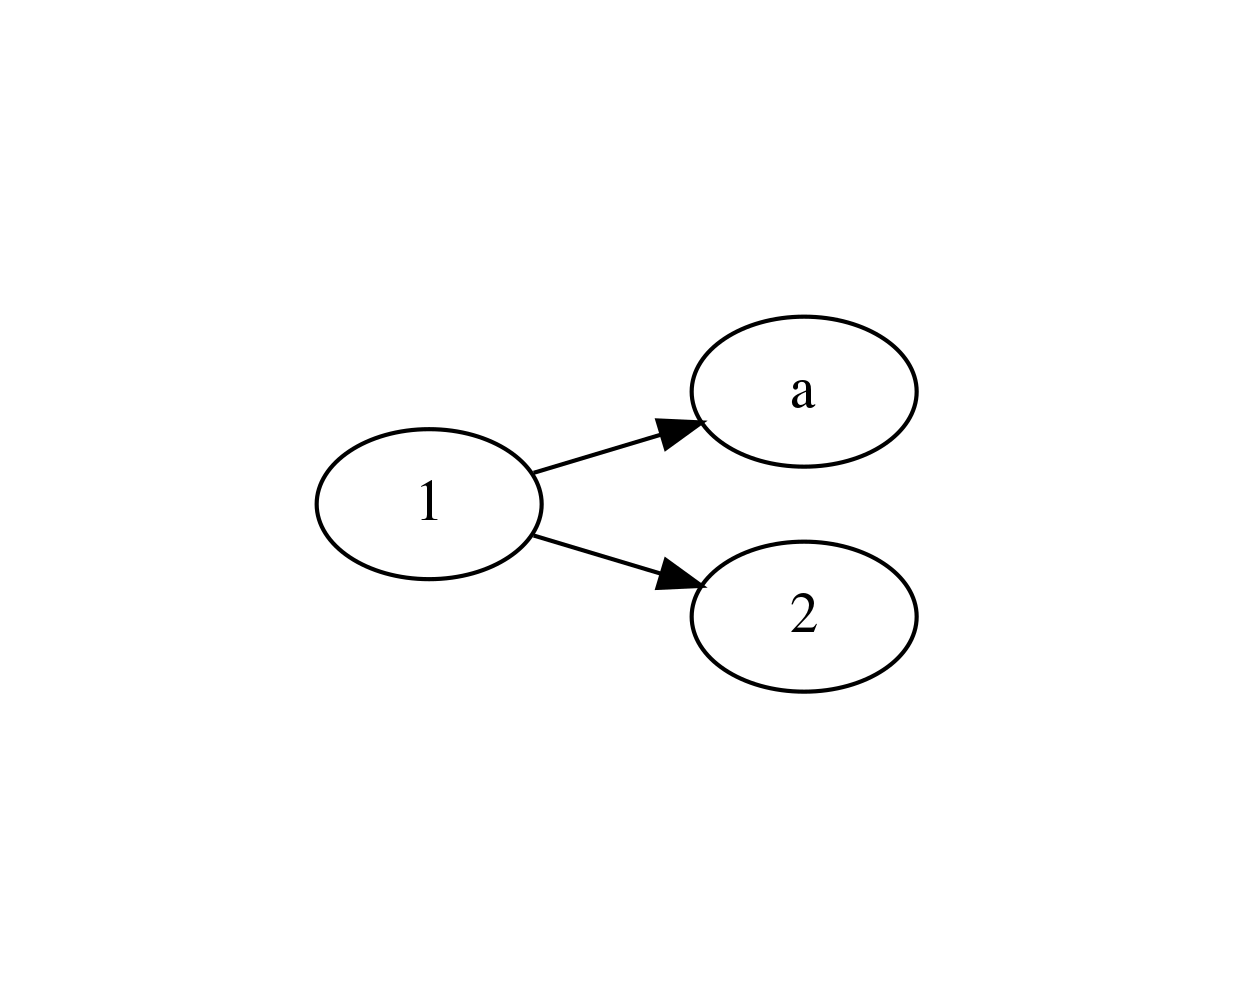

In [9]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

Image('./image/17.01 그래프 이론 기초_15_0.png', width=600)

- 노드의 갯수 : cardinality
- 간선의 갯수

In [10]:
len(g1), g1.number_of_nodes(), g1.number_of_edges()

(3, 3, 2)

- 이웃 여부 확인

In [11]:
g1.neighbors(1), 'a' in g1.neighbors(1)

(['a', 2], True)

- 셀프 루프

In [12]:
g2 = nx.Graph()
g2.add_node(1)
g2.add_node(2)
g2.add_node(3)
g2.add_edge(1,2)
g2.add_edge(2,2)  # 셀프 루프
g2.add_edge(2,3)
np.random.seed(0)

- has_path / shortest_path

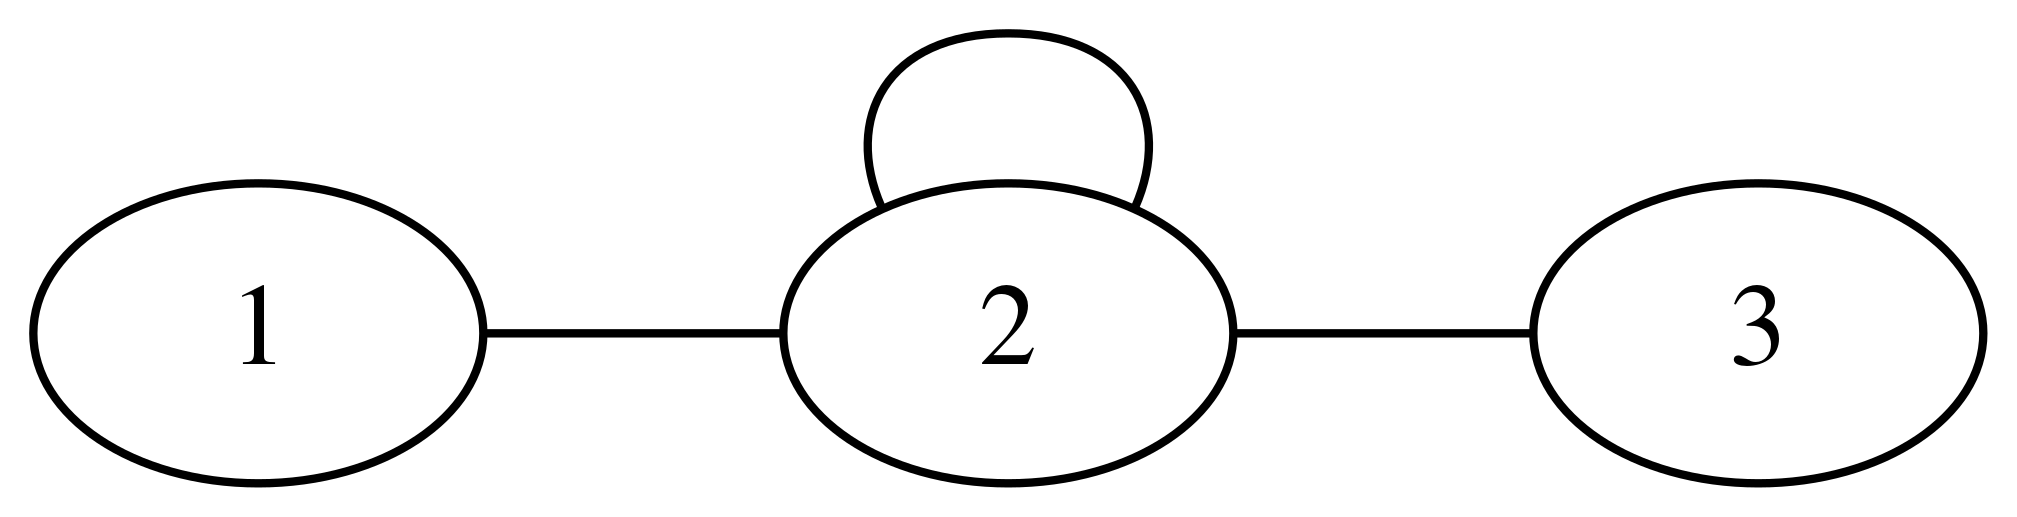

In [13]:
Image('./image/17.01 그래프 이론 기초_24_0.png', width=600)

## 워크, 패스, 사이클, 트레일

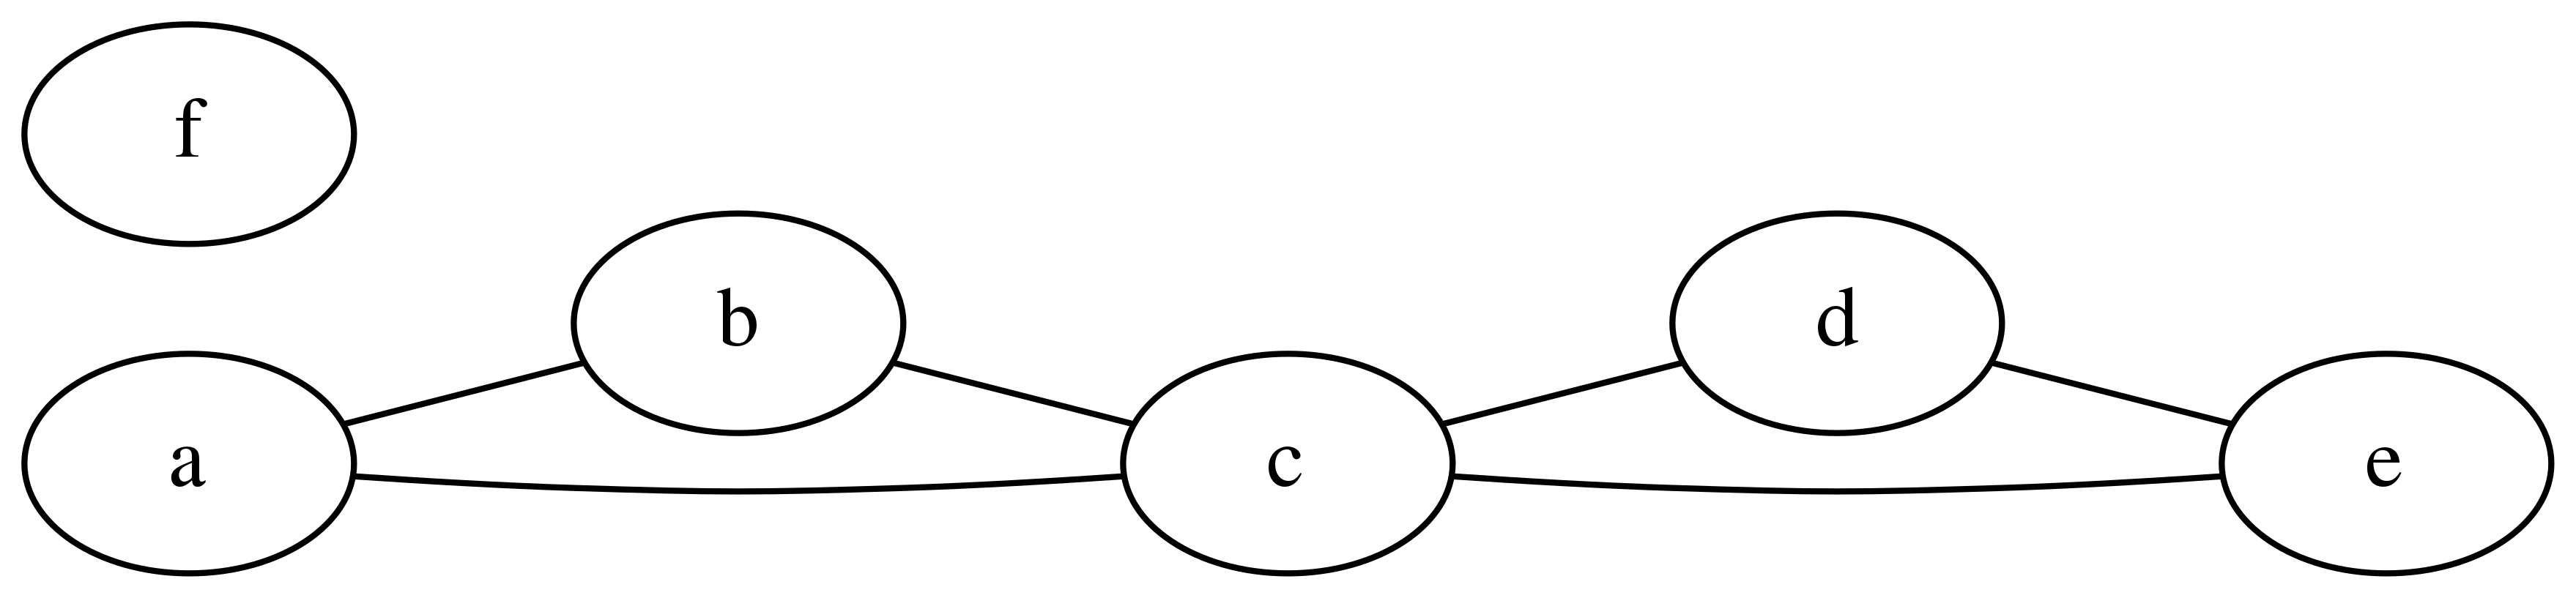

In [17]:
g3 = nx.Graph()
g3.add_node('a')
g3.add_node('b')
g3.add_node('c')
g3.add_node('d')
g3.add_node('e')
g3.add_node('f')
g3.add_edge('a','b')
g3.add_edge('a','c')
g3.add_edge('b','c')
g3.add_edge('c','d')
g3.add_edge('d','e')
g3.add_edge('c','e')

Image('./image/17.01 그래프 이론 기초_28_0.png', width=600)

In [15]:
nx.has_path(g3, 'a','b'), nx.has_path(g3, 'a','f')

(True, False)

In [16]:
nx.shortest_path(g3, 'a','e')

['a', 'c', 'e']

## 클리크

In [18]:
g4 = nx.Graph()
g4.add_node("a")
g4.add_node("b")
g4.add_node("c")
g4.add_node("d")
g4.add_node("e")
g4.add_node("f")
g4.add_edge("a", "b")
g4.add_edge("a", "c")
g4.add_edge("b", "c")
g4.add_edge("b", "d")
g4.add_edge("c", "d")
g4.add_edge("d", "e")
g4.add_edge("d", "f")
g4.add_edge("e", "f")

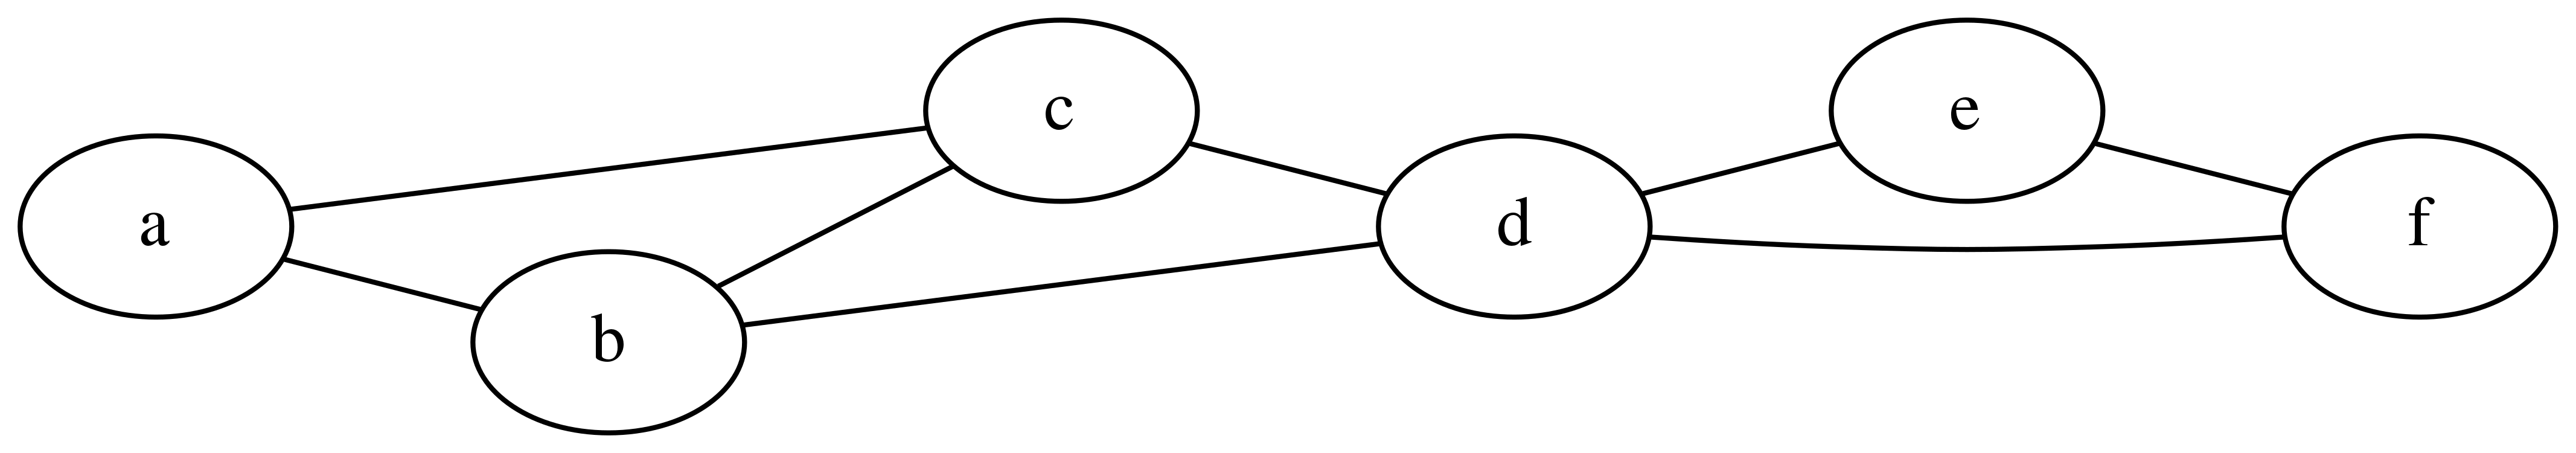

In [19]:
Image('./image/17.01 그래프 이론 기초_34_0.png', width=600)

- 특정 노드를 포함하는 클리크 찾기

In [20]:
nx.cliques_containing_node(g4, ['a'])

{'a': [['a', 'b', 'c']]}

In [21]:
nx.cliques_containing_node(g4, ['a','b'])

{'a': [['a', 'b', 'c']], 'b': [['d', 'b', 'c'], ['a', 'b', 'c']]}

- enumerate_all_cliques : 모든 클리크 찾기

In [24]:
for c in nx.enumerate_all_cliques(g4):
    print(c)

['a']
['b']
['c']
['d']
['e']
['f']
['a', 'b']
['a', 'c']
['b', 'c']
['b', 'd']
['c', 'd']
['d', 'e']
['d', 'f']
['e', 'f']
['a', 'b', 'c']
['b', 'c', 'd']
['d', 'e', 'f']


- nx.find_cliques : 모든 최대클리크 찾기

In [27]:
for c in nx.find_cliques(g4):
    print(c)

['d', 'e', 'f']
['d', 'b', 'c']
['a', 'b', 'c']
